In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploracion de datos

## Application train

Importamos el dataset de entrenamiento, y revisamos sus estadisticas principales rapidamente.

In [135]:
data_train = pd.read_csv('../input/application_train.csv')
print(data_train.shape)
data_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Al revisar las estadisticas que muestra la sentencia *data_train.describe()* observamos algo extraño en algunas columnas, como la columna *Days_Birth* que tiene valores negativos, y esto se debe a que las edades estan calculadas en dias y de manera relativa a la aplicación del prestamo.

In [136]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

Para arreglar esta irregularidad en los datos, sacamos el valor absoluto de los dias que nos presenta el dataset, y para una vision mas comun de la edad, lo convertimos en años dividiendo por 365.

In [137]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])/365

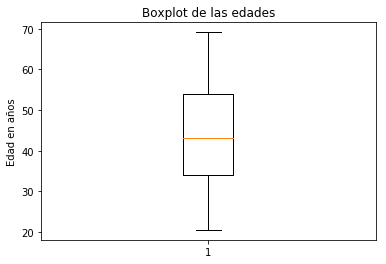

In [138]:
#revisamos con un boxplot que todo este mas o menos normal y no existan outliers exagerados
plt.boxplot(data_train['DAYS_BIRTH'])
plt.title('Boxplot de las edades')
plt.ylabel('Edad en años');

Todo parece estar bien con las edades, ahora haremos lo mismo con la columna de *DAYS_EMPLOYED* que posee la misma irregularidad

In [139]:
data_train['DAYS_EMPLOYED'] = abs(data_train['DAYS_EMPLOYED'])/365

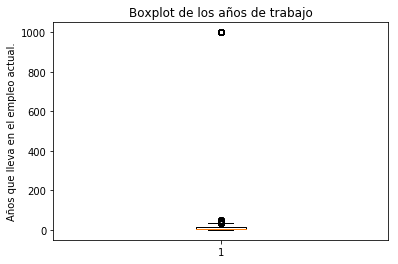

In [140]:
plt.boxplot(data_train['DAYS_EMPLOYED'])
plt.title('Boxplot de los años de trabajo')
plt.ylabel('Años que lleva en el empleo actual.');

Y se puede observar que existen outliers, y unos muy exagerados he ilogicos, tanto asi que hay algunos que han estado 1000 años en su ultimo empleo.
- Estos Outliers se eliminaran inmediatamente, y quedaran como valores *NaN* porque es ilogico e imposible que una persona haya trabajado o vivido 1000 años.
- Otra cosa importante, es que estos valores extraños, son todos iguales y equivalen a 1000.6657534246575 años de trabajo. **ENTONCES** cuando rellenemos estos valores *NaN* que crearemos, todos van a ser llenados con el mismo valor.

In [141]:
weird_data = data_train[data_train['DAYS_EMPLOYED'] >= 1000]
('Los datos raros corresponden a un %0.2f%% de todos los datos.' % (100*weird_data['DAYS_EMPLOYED'].shape[0]/data_train.shape[0]))

'Los datos raros corresponden a un 18.01% de todos los datos.'

In [142]:
data_train['DAYS_EMPLOYED'].replace(1000.6657534246575, np.nan, inplace=True)

Se siguen observando Outliers, pero mas logicos, ya que hay personas de mas de 60 años, es posible que lleven 40 años en el mismo trabajo


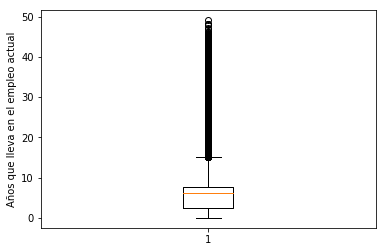

In [143]:
#Y graficamos de nuevo para ver el nuevo boxplot, llenando los Valores NaN con el promedio de la columna.
Days_Job = data_train['DAYS_EMPLOYED'].copy()
Days_Job.fillna(Days_Job.mean(), inplace=True)
print('Se siguen observando Outliers, pero mas logicos, ya que hay personas de mas de 60 años, es posible que lleven 40 años en el mismo trabajo')
plt.boxplot(Days_Job)
plt.ylabel('Años que lleva en el empleo actual');

- Revisamos las otras columnas que tienen el mismo formato de dias relativos a la aplicacion del credito, y las transformamos a valores positivos.
- Los Outliers presentados en estas columnas se pueden pasar por alto, ya que son posibles.

In [144]:
data_train['DAYS_REGISTRATION'] = abs(data_train['DAYS_REGISTRATION'])

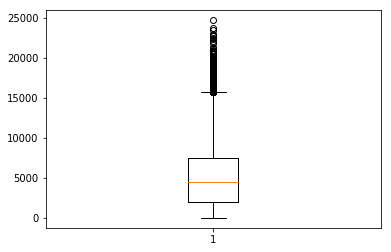

In [145]:
plt.boxplot(data_train['DAYS_REGISTRATION']);

In [146]:
data_train['DAYS_ID_PUBLISH'] = abs(data_train['DAYS_ID_PUBLISH'])

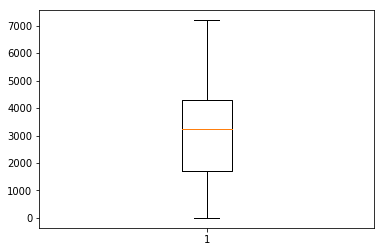

In [147]:
plt.boxplot(data_train['DAYS_ID_PUBLISH']);

Graficando se puede ver que nuestro dataset esta muy desbalanceado.

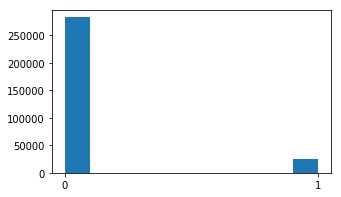

In [148]:
plt.figure(figsize=(5,3))
plt.hist(data_train['TARGET'].astype(int))
plt.xticks([0,1]);

Explicitamente se puede ver la proporcion de cada posible valor de nuestro TARGET

In [149]:
print('target 1 :', sum(data_train.TARGET==1), 'datos')
print('target 0 :', sum(data_train.TARGET==0), 'datos')
print('------------------')
print('%target 1 :', np.mean(data_train.TARGET==1))
print('%target 0 :', np.mean(data_train.TARGET==0))

target 1 : 24825 datos
target 0 : 282686 datos
------------------
%target 1 : 0.08072881945686496
%target 0 : 0.9192711805431351


Buscando valores NaN

In [150]:
print('valores NaN', data_train.isnull().sum().sum())
print('porcentaje de valores NaN en el DF:', 100*data_train.isnull().sum().sum()/(data_train.shape[0]*data_train.shape[1]))

valores NaN 9207839
porcentaje de valores NaN en el DF: 24.543541585157744


Los valores NaN se trataran justo antes de empezar a realizar las predicciones, esto con el fin de probar varias maneras de llenar los valores NaN y escoger la que mejor rendimiento presente.

__________


Buscando caracteristicas categoricas... obtenemos 16!

In [151]:
data_train.dtypes.value_counts()

float64    67
int64      39
object     16
dtype: int64

revisando cuantos valores unicos poseen las caracteristicas categoricas

In [152]:
obj_columns = data_train.dtypes[data_train.dtypes.values == 'object'].index.tolist()

In [153]:
print(data_train[obj_columns].apply(pd.Series.nunique, axis = 0))
print('cantidad de elementos unicos en las variables categoricas', data_train[obj_columns].apply(pd.Series.nunique, axis = 0).values.sum())

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
cantidad de elementos unicos en las variables categoricas 140


Tienen muy pocos valores unicos

## Application Test

Dataset de testeo. Se le realiza el mismo analisis que al anterior.

A primera vista se ve que el conjunto de testeo es significativamente mas pequeño que el conjunto de entrenamiento.

In [154]:
data_test = pd.read_csv('../input/application_test.csv')
print(data_test.shape)
data_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

**Checkeo y Correccion de irregularidades en las columnas del dataset**  
Se realiza el mismo proceso que se uso en el dataset de entrenamiento para corregir las irregularidades encontradas.

In [156]:
data_test['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])/365

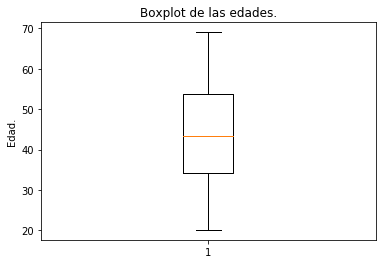

In [157]:
#Todo parece estar en orden con las edades
plt.boxplot(data_test['DAYS_BIRTH'])
plt.title('Boxplot de las edades.')
plt.ylabel('Edad.');

Para los dias de empleo que tiene en el trabajo actual

In [158]:
data_test['DAYS_EMPLOYED'] = abs(data_test['DAYS_EMPLOYED'])/365

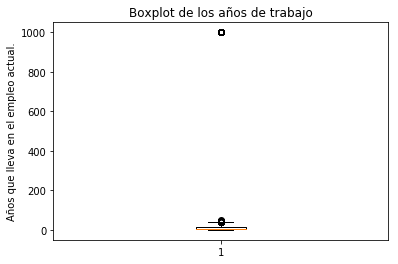

In [159]:
#Todo parece estar en orden con las edades
plt.boxplot(data_test['DAYS_EMPLOYED'])
plt.title('Boxplot de los años de trabajo')
plt.ylabel('Años que lleva en el empleo actual.');

In [160]:
data_test['DAYS_EMPLOYED'].replace(1000.6657534246575, np.nan, inplace=True)

In [161]:
print('Maximo valor: ', data_test['DAYS_EMPLOYED'].max())
print('Minimo valor', data_test['DAYS_EMPLOYED'].min())

Maximo valor:  47.843835616438355
Minimo valor 0.0027397260273972603


Para las otras dos variables del mismo formato.

In [162]:
data_test['DAYS_REGISTRATION'] = abs(data_test['DAYS_REGISTRATION'])

In [163]:
print('Maximo valor: ', data_test['DAYS_REGISTRATION'].max())
print('Minimo valor', data_test['DAYS_REGISTRATION'].min())

Maximo valor:  23722.0
Minimo valor 0.0


In [164]:
data_test['DAYS_ID_PUBLISH'] = abs(data_test['DAYS_ID_PUBLISH'])

In [165]:
print('Maximo valor: ', data_test['DAYS_ID_PUBLISH'].max())
print('Minimo valor', data_test['DAYS_ID_PUBLISH'].min())

Maximo valor:  6348
Minimo valor 0


**Reviso los valores NaN**

Se puede notar que la proporcion de valores NaN no varia mucho en comparación al dataset de entrenamiento.

In [166]:
print('valores NaN', data_test.isnull().sum().sum())
print('porcentaje de valores NaN en el DF es de %0.2f%%' %(100*data_test.isnull().sum().sum()/(data_test.shape[0]*data_test.shape[1])))

valores NaN 1413693
porcentaje de valores NaN en el DF es de 23.97%


**Buscando las columnas categoricas**  
Al tratarse de la parte de un mismo archivo, se puede ver que el dataset de testeo posee las mismas columnas categoricas que el dataset de entrenamiento

In [167]:
data_test.dtypes.value_counts()

float64    67
int64      38
object     16
dtype: int64

In [168]:
obj_columns = data_test.dtypes[data_test.dtypes.values == 'object'].index.tolist()

In [169]:
print(data_test[obj_columns].apply(pd.Series.nunique, axis = 0))
print('cantidad de elementos unicos en las variables categoricas', data_test[obj_columns].apply(pd.Series.nunique, axis = 0).values.sum())

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
cantidad de elementos unicos en las variables categoricas 137


***Aunque si se nota un leve cambio en la cantidad de valores unicos que poseen las columnas categoricas.***

# Pre-Procesado de datos

### Codificación de las caracteristicas categoricas

- Usando LabelEncoder para las caracteristicas con 2 categorias
- Usando OneHotEncoder (para crear variables Dummy) para las caracteristicas que tengan mas de 2 categorias

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
label = LabelEncoder()

for i in obj_columns:
    if len(data_train[i].unique()) <= 2:
        #entreo el objeto encoder
        label.fit(data_train[i])
        #aplico la transformacion en los dos DF principales.
        data_train[i] = label.transform(data_train[i])
        data_test[i] = label.transform(data_test[i])

#Ahora codificar las que tienen mas de 2 categorias.
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [172]:
print('Nuevas dimensiones del DF:', data_train.shape)
print('Nuevas dimensiones del DF:', data_test.shape)

Nuevas dimensiones del DF: (307511, 243)
Nuevas dimensiones del DF: (48744, 239)


Por esta razon tenemos que modificar los dataset de entrenamiento y prueba, ya que deben tener la misma cantidad de columnas para que el modelo predictivo que se cree nos sirva.  

- Se penso en usar el metodo Join, pero el metodo JOIN nos retornaria un solo dataset, y nosotros necesitamos tener los dos, entonces...
- Se usara el metodo Align para "alinear" los dos archivos y que queden con un mismo numero de columnas, sin tener que necesariamente unirlos.

In [173]:
#Lo primero es salvar nuestra columna de TARGET, porque esta columna no esta en el dataset de pruebas
Targets = data_train['TARGET']

In [174]:
#hacemos uso del metodo align, que nos permite "recortar" los dataframes para que queden con la misma
#cantidad de columnas. (Usamos las columnas que tienen en comun los dos dataframes)
#Usamos axis = 1 para que nos realice el proceso por columnas y no por filas.
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [175]:
#Ahora solo hay que agregar de nuevo la columna de los TARGETS a nuestro nuevo dataset de entrenamiento
data_train['TARGET'] = Targets

In [176]:
print('Nuevas dimensiones del DF:', data_train.shape)
print('Nuevas dimensiones del DF:', data_test.shape)

Nuevas dimensiones del DF: (307511, 240)
Nuevas dimensiones del DF: (48744, 239)


## Feature Engineering

### Buscando Correlaciones
Este paso es muy importante ya que podemos encontrar que caracteristicas afectan mas a nuestro *TARGET*

In [177]:
corrs = data_train.corr()

Nos interesa ver las correlaciones de las variables contra nuestra variable *TARGET*

In [178]:
corrs.sort_values('TARGET', inplace=True)

In [179]:
corrs = corrs['TARGET']

In [180]:
corrs.head(10)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
DAYS_EMPLOYED                          -0.074958
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
DAYS_ID_PUBLISH                        -0.051457
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
Name: TARGET, dtype: float64

In [181]:
corrs.tail(10)

REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Se puede observar que las columnas que afectan mas de manera positiva son:
- CODE_GENDER_M                                      
- DAYS_LAST_PHONE_CHANGE                            
- NAME_INCOME_TYPE_Working                            
- REGION_RATING_CLIENT                                
- REGION_RATING_CLIENT_W_CITY 

Y las que mas afectan de manera negativa son:
- EXT_SOURCE_3                        
- EXT_SOURCE_2                         
- EXT_SOURCE_1                        
- DAYS_BIRTH                            
- DAYS_EMPLOYED                          

Obteniendo las caracteristicas mas importantes con otro metodo... Entrenando un RandomForestClassifier.

Pero primero debemos rellenar los NaN  

**Tratamiento de los valores NaN**

- Lo primero es obtener las columnas que poseen valores NaN.
- Y luego rellenar los valores NaN con alguna estrategia.

In [182]:
columns_NaN = data_train.isnull().sum()[data_train.isnull().sum().values > 0].index.tolist()

In [183]:
data_train['OWN_CAR_AGE'].fillna(0, inplace=True)
data_train.fillna(np.mean(data_train), inplace=True)

Ahora el mismo procedimiento para el dataset de test

In [184]:
columns_NaN = data_test.isnull().sum()[data_test.isnull().sum().values > 0].index.tolist()

In [185]:
data_test['OWN_CAR_AGE'].fillna(0, inplace=True)
data_test.fillna(np.mean(data_test), inplace=True)

### Creando un bosque aleatorio clasificador para obtener la importancia de las caracteristicas

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
RFC = RandomForestClassifier()

In [188]:
cl = data_train.columns.values.tolist()
cl.remove('TARGET')

In [189]:
cl = data_train.columns.values.tolist()
cl.remove('TARGET')
X = data_train.filter(cl)
y = data_train['TARGET']
RFC.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

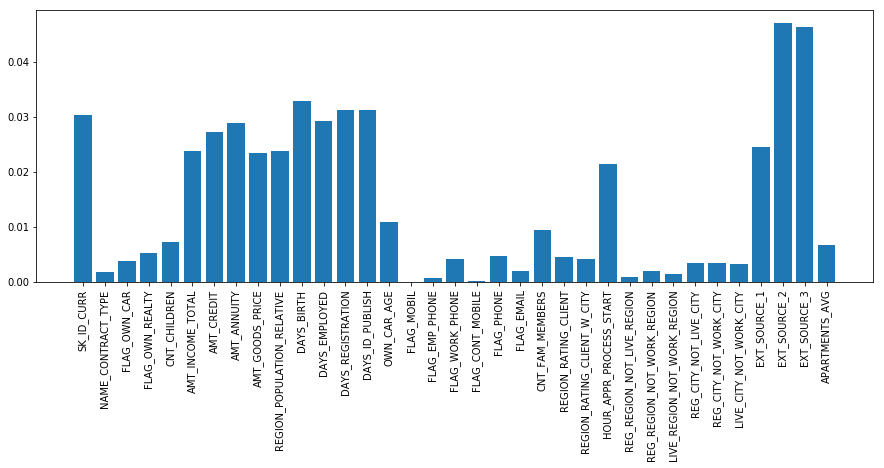

In [190]:
plt.figure(figsize=(15,5))
plt.bar(X.columns.values.tolist()[:35], RFC.feature_importances_[:35])
plt.xticks(rotation=90);

Como se observo anteriormente con el coeficiente de pearson (con la funcion de pandas .corr()) los campos que mas afectan a nuestro *TARGET* son los de EXT_SORCE_#, y otros como el *INCOME_TOTAL*, *AMT_ANNUITY*, *GOODS_PRICE*, *DAYS_EMPLOYED*, entre otros como se ve en la anterior grafica.  
Y algo curioso es que la edad *DAYS_BIRTH* afecta.  

### Re-Escalado de los datos
Es necesario hacerlo para que una columna no influya mucho mas que otra por la escala en la que estan los datos.

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaler = MinMaxScaler(feature_range=(0,1))

In [193]:
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(data_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Hacemos unas predicciones para probar lo que hemos hecho hasta aca.

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
LR = LogisticRegression()

In [196]:
LR.fit(X_train, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [197]:
#Usamos el metodo predict_proba ya que este nos devuelve un array de n x 2, donde n son
#las observaciones, y 2 son las columnas, la primera columna para las probabilidades de 
#que salga 0 y la segunda para las probabilidades de 1. Para nuestro reto necesitamos 
#la segunda columna.
result = LR.predict_proba(X_test)[:,1]

Ahora que tenemos las probabilidades, tenemos que crear el archivo con el formato que exige la competencia de kaggle para obtener nuestro score.

In [198]:
submission = data_test[['SK_ID_CURR']]

In [199]:
submission['TARGET'] = result

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
submission.head(10)

,SK_ID_CURR,TARGET
0,100001,0.056481
1,100005,0.212261
2,100013,0.042172
3,100028,0.034225
4,100038,0.129258
5,100042,0.022847
6,100057,0.019992
7,100065,0.096406
8,100066,0.017209
9,100067,0.112297


In [201]:
submission.to_csv('submission.csv', index=False)

### Probando con un Arbol de clasificacion.

In [202]:
RFC = RandomForestClassifier(n_estimators=100, n_jobs=-1)
RFC.fit(X_train,y)
RF_Results = RFC.predict_proba(X_test)[:,1]

In [203]:
submission2 = data_test[['SK_ID_CURR']]
submission2['TARGET'] = RF_Results
submission2.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.14
1,100005,0.11
2,100013,0.07
3,100028,0.08
4,100038,0.19
5,100042,0.11
6,100057,0.08
7,100065,0.09
8,100066,0.11
9,100067,0.17


In [204]:
submission2.to_csv('Submission2.csv', index=False)

### Prueba con el algoritmo de GradientBoostingClassifier

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y)
GB_Results = GBC.predict_proba(X_test)[:,1]

In [206]:
Submission3 = data_test[['SK_ID_CURR']]

In [207]:
Submission3['TARGET'] = GB_Results

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
Submission3.head(10)

,SK_ID_CURR,TARGET
0,100001,0.048838
1,100005,0.107343
2,100013,0.029464
3,100028,0.039527
4,100038,0.092788
5,100042,0.041874
6,100057,0.030204
7,100065,0.043056
8,100066,0.023990
9,100067,0.098472


In [209]:
Submission3.to_csv('Submission3.csv', index=False)

### Reduccion de dimensionalidad con PCA

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold